# Decision Tree Worksheet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

# Replace 0's with NaN's in the "invalid" columns
for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)

# Drop rows with NaN's, and drop the resultant indexing column
data = data.dropna(axis=0).reset_index(drop=True)
data.head()
## YOUR CODE HERE
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)


## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None, max_depth=50, min_samples_leaf=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=5)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  91.2
Validation Accuracy is  74.60317460317461


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree_lowd = DecisionTreeClassifier(criterion = "entropy", random_state = None, max_depth=5, min_samples_leaf=50)
decision_tree_lowd.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred_low_depth=decision_tree_lowd.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_low_depth)*100)
y_val_pred_low_depth=decision_tree_lowd.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_low_depth)*100)

Training Accuracy is  77.2
Validation Accuracy is  73.01587301587301


Explain the accuracy results below. 

The model with high max_depth tends to perform better overall compared with the model with low max_depth, but the low max_depth model is influenced less by overfitting.

## Metrics

Plot the ROC curve and print the AUC of the second model.

0.7804347826086957


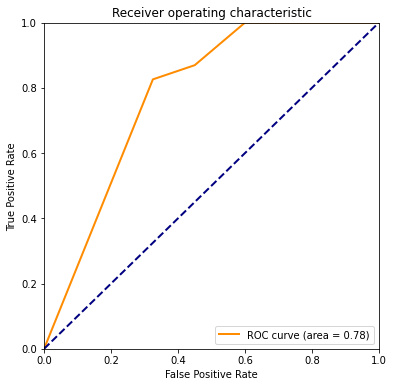

preg     1.000
plas    87.000
pres    68.000
skin    34.000
test    77.000
mass    37.600
pedi     0.401
age     24.000
Name: 289, dtype: float64


In [ ]:
## YOUR CODE HERE

from sklearn import metrics

labels = [0,1]
y_val_prob = decision_tree_lowd.predict_proba(X_val)

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(X_train.iloc[1, :])

Use graphviz to visualize your 2nd tree.

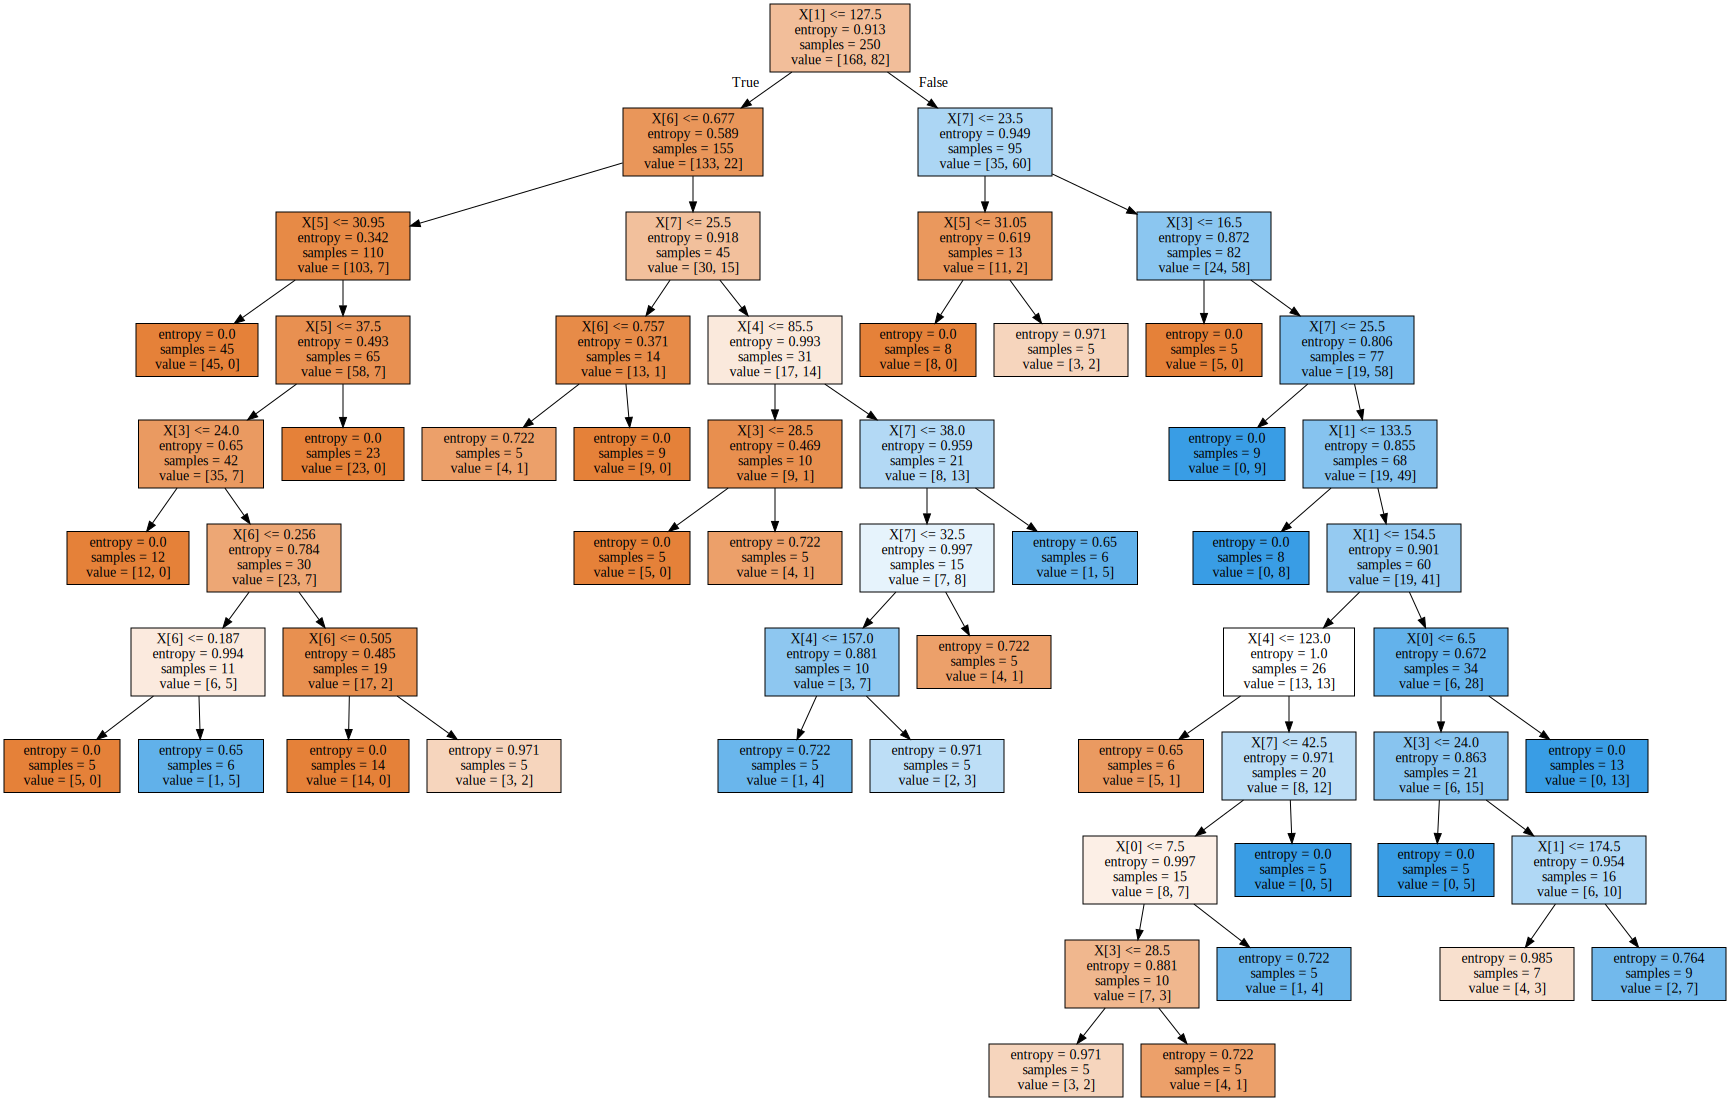

In [ ]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

They represents different features used in the decision process.

Question 2: What is the root feature? Does it make sense as the root feature?

The root feature is plas. It was selected because of its entropy score, so it makes sense as the root feature because it has the highest entropy score.

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

The training accuracy should be 100%, but the test accuracy might be relatively low.

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None, max_depth=500, min_samples_leaf=1)
decision_tree.fit(X_train, y_train)
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  80.95238095238095


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
## YOUR CODE HERE
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937


How did the accuracy compare to the decision tree's accuracy?

Random forest had a higher training accuracy and validation accuracy than the decision tree.

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
## YOUR CODE HERE

importance = random_forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

print(str(1) + " " + str(4) + " " + str(7))

Feature: 0, Score: 0.07991
Feature: 1, Score: 0.25612
Feature: 2, Score: 0.07224
Feature: 3, Score: 0.08371
Feature: 4, Score: 0.15844
Feature: 5, Score: 0.10980
Feature: 6, Score: 0.11081
Feature: 7, Score: 0.12898
1 4 7


In [ ]:
data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
plas,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
pres,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
skin,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
test,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
mass,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
pedi,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
class,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

In [ ]:
## YOUR CODE HERE
for i in range(0,101, 5):
    if i == 0:
        i = 1
    curr_r_forest = RandomForestClassifier(n_estimators=i)
    curr_r_forest.fit(X_val, y_val)
    y_val_pred=curr_r_forest.predict(X_val)
    print("Validation Accuracy for " + str(i) + " trees is ", accuracy_score(y_val,y_val_pred)*100)


Validation Accuracy for 1 trees is  90.47619047619048
Validation Accuracy for 5 trees is  98.4126984126984
Validation Accuracy for 10 trees is  100.0
Validation Accuracy for 15 trees is  98.4126984126984
Validation Accuracy for 20 trees is  100.0
Validation Accuracy for 25 trees is  100.0
Validation Accuracy for 30 trees is  100.0
Validation Accuracy for 35 trees is  100.0
Validation Accuracy for 40 trees is  98.4126984126984
Validation Accuracy for 45 trees is  100.0
Validation Accuracy for 50 trees is  100.0
Validation Accuracy for 55 trees is  100.0
Validation Accuracy for 60 trees is  100.0
Validation Accuracy for 65 trees is  100.0
Validation Accuracy for 70 trees is  100.0
Validation Accuracy for 75 trees is  100.0
Validation Accuracy for 80 trees is  100.0
Validation Accuracy for 85 trees is  100.0
Validation Accuracy for 90 trees is  100.0
Validation Accuracy for 95 trees is  100.0
Validation Accuracy for 100 trees is  100.0


Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

0.8804347826086956


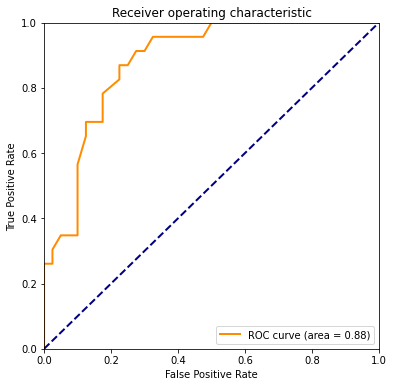

In [ ]:
## YOUR CODE HERE

y_val_prob = random_forest.predict_proba(X_val)

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b2e5d927-2385-4568-8e15-cf987a345e38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>